<h2>Introduction</h2>
<p>
In this notebook we are going to apply an EDA the English Premier League player data set ranging from the 2015-16 to 2018-19 seasons. The dataset includes player positional data such as player age, fouls commited per season, season year scope, nation of the player, market value at beginning of season, and position of player.
</p>
<br>
<hr>
<br>
<h3> About the dataset </h3>

<p>
Data is pulled from premierleague.com and graciously compiled into csvs <a href="https://www.kaggle.com/datasets/dortmund4436/premier-league-player-stats-from-2015-to-2018" alt="link to kaggle data"> here </a>.
</p>


<br>
<hr>
<br>
<h4> Data Definitition </h4>

<p>

<strong> Player: </strong> Name of the player. <br>

<strong> Season: </strong> The season expressed in the starting and ending year where the features are scoped. <br>

<strong> Born: </strong> The year of the players birth. <br>

<strong> Nation: </strong> The country the player represents. <br>

<strong> Age: </strong> Number of years the player was during the season. <br>

<strong> Squad: </strong> The club where the player was registered for the given season. <br>

<strong> Previous Market Value: </strong> Market value of the player before the season started <br>

<strong> Position: </strong> General position player plays in. <br>

<strong> App: </strong> The number of appearances a player made for the specific season. <br>

<strong>Minutes</strong>: The total number of minutes played by a player during a match.<br>

<strong>Goals</strong>: The number of goals scored by a player during a match.<br>

<strong>Passes</strong>: The total number of successful passes made by a player during a match.<br>

<strong>Assists</strong>: The number of times a player has provided a pass or set up a goal-scoring opportunity for a teammate.<br>

<strong>Yellow</strong>: The number of yellow cards received by a player during a match, indicating a caution from the referee.<br>

<strong>Red</strong>: The number of red cards received by a player during a match, resulting in a dismissal from the game.<br>

<strong>SubOn</strong>: The number of times a player has been substituted onto the field during a match.<br>

<strong>SubOff</strong>: The number of times a player has been substituted off the field during a match.<br>

<strong>Shots</strong>: The total number of shots taken by a player during a match.<br>

<strong>SOT</strong>: The number of shots on target (SOT) taken by a player during a match, indicating shots that were aimed towards the goal.<br>

<strong>HitPost</strong>: The number of times a player's shot has hit the goalpost during a match.<br>

<strong>HeadClear</strong>: The number of times a player has successfully cleared the ball with their head during a match.<br>

<strong>HeadGoal</strong>: The number of goals scored by a player using their head during a match.<br>

<strong>PKScored</strong>: The number of penalty kicks successfully converted into goals by a player during a match.<br>

<strong>FKGoal</strong>: The number of goals scored by a player from a free-kick during a match.<br>

<strong>Offsides</strong>: The number of times a player has been caught in an offside position during a match.<br>

<strong>ThrBall</strong>: The number of through balls played by a player during a match, indicating a pass that splits the opposing defense and reaches a teammate.<br>

<strong>Misses</strong>: The number of shots or passes attempted by a player that did not reach the intended target.<br>

<strong>Corners</strong>: The number of corner kicks taken by a player during a match.<br>

<strong>Crosses</strong>: The number of crosses delivered by a player from wide areas into the opposition's penalty area during a match.<br>

<strong>Blocks</strong>: The number of times a player has blocked an opponent's shot or pass during a match.<br>

<strong>Interceptions</strong>: The number of times a player has intercepted the ball from an opponent during a match.<br>

<strong>Fouls</strong>: The number of fouls committed by a player during a match.<br>

<strong>Last man</strong>: A situation where a player is the last defender and risks conceding a goal if they fail to successfully defend against an attacking opponent.<br>

<strong>Tackles</strong>: The number of successful tackles made by a player during a match, indicating a defensive action to dispossess an opponent.<br>

<strong>ELG</strong>: Acronym for Expected Goals, a statistical measure estimating the probability of a shot resulting in a goal.<br>

<strong>OwnGoal</strong>: The number of own goals scored by a player during a match, where they inadvertently score a goal for the opposing team.<br>

<strong>Clears</strong>: The number of times a player has successfully cleared the ball from their team's defensive area during a match.<br>

<strong>ABW</strong>: Acronym for Aerial Battles Won, representing the number of aerial duels won by a player during a match, indicating successful challenges for the ball in the air.<br>

<strong>ABL</strong>: Acronym for Aerial Battles Lost, representing the number of aerial duels lost by a player during a match, indicating unsuccessful challenges for the ball in the air.<br>

</p>

<br>

<hr>

<br>

<h4> Hypothesis and Root Exploration Cause</h4>
<p> Due to the increase in television funding, the Premier League is experiencing an staggering inflation of player valuation. As a player value increases, I believe there is a point where market value outstrips the return on investment for what an individual player can bring to the club. More specifically, as a player projected value increases, it attracts more scouting attention thus further inflating the player demand and valuation. This EDA will explore at what value per position is a player statistically the best buy. As a secondary point, a commonly discussed issue known as "The English Tax" relates to a massive overvaluation of domestic players. Is this true when also comparing international players with very similar features?
</p>
<br>
<hr>

<h3> Setup of Data </h3>

<p> First steps, I will import all the required python libraries and configure the base directories so that loading each season's dataframe requires less change when moving the data between systems. Each season will have separate analytics completed before merging all seasons together for a roll up view.
</p>

In [5]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sbn

basedir = os.path.dirname(os.path.abspath(__name__))

# Setting up Dataframe
df = pd.read_csv(os.path.join(basedir,'premierleague.csv'))

# Enable view of all features at once
pd.set_option('display.max_columns', None)
# Increase figure sizes
sbn.set(rc={"figure.figsize":(40, 12)})

<h4> Data Types and Values </h4>

All of the feature data types match what we want with the exception of season. The string value of "201x-201y" is clear, however, it doesn't make ordering very easy. I will be changing the Season to "Season Start Year" and converting the column into an int-based type. 
<p>


In [6]:
dtypes = df.dtypes

df.replace(to_replace=["2015-2016","2016-2017","2017-2018","2018-2019"], value=[2015,2016,2017,2018], inplace=True)

dtypes

Player                   object
Season                   object
Born                      int64
Age                       int64
Squad                    object
Nation                   object
Previous Market Value     int64
Market Value              int64
Position                 object
App                       int64
Minutes                   int64
Goals                     int64
Passes                    int64
Assists                   int64
Yellow                    int64
Red                       int64
SubOn                     int64
SubOff                    int64
Shots                     int64
SOT                       int64
HitPost                   int64
HeadClear                 int64
HeadGoal                  int64
PKScored                  int64
FKGoal                    int64
Offsides                  int64
ThrBall                   int64
Misses                    int64
Corners                   int64
Crosses                   int64
Blocks                    int64
Intercep

<h4> Dataframe Separation </h4>

<p> Value of a player is entirely based on the specific skills of his/her position. To give us a better understanding of what skills are correlated to market value, I will be separating each position into separate dataframes.
</p>

In [7]:
def_df = df[df["Position"] == "DF"]
fw_df = df[df["Position"] == "FW"]
mf_df = df[df["Position"] == "MF"]

In [8]:
new_def_df = def_df[::]
new_def_df.sort_values(by="Market Value", inplace=True, ascending=False)

stopping_point = (len(new_def_df)-round(len(new_def_df)*.10))
starting_point = len(new_def_df) - stopping_point
trimmed_def = new_def_df[starting_point:stopping_point]


<Axes: xlabel='Nation', ylabel='Market Value'>

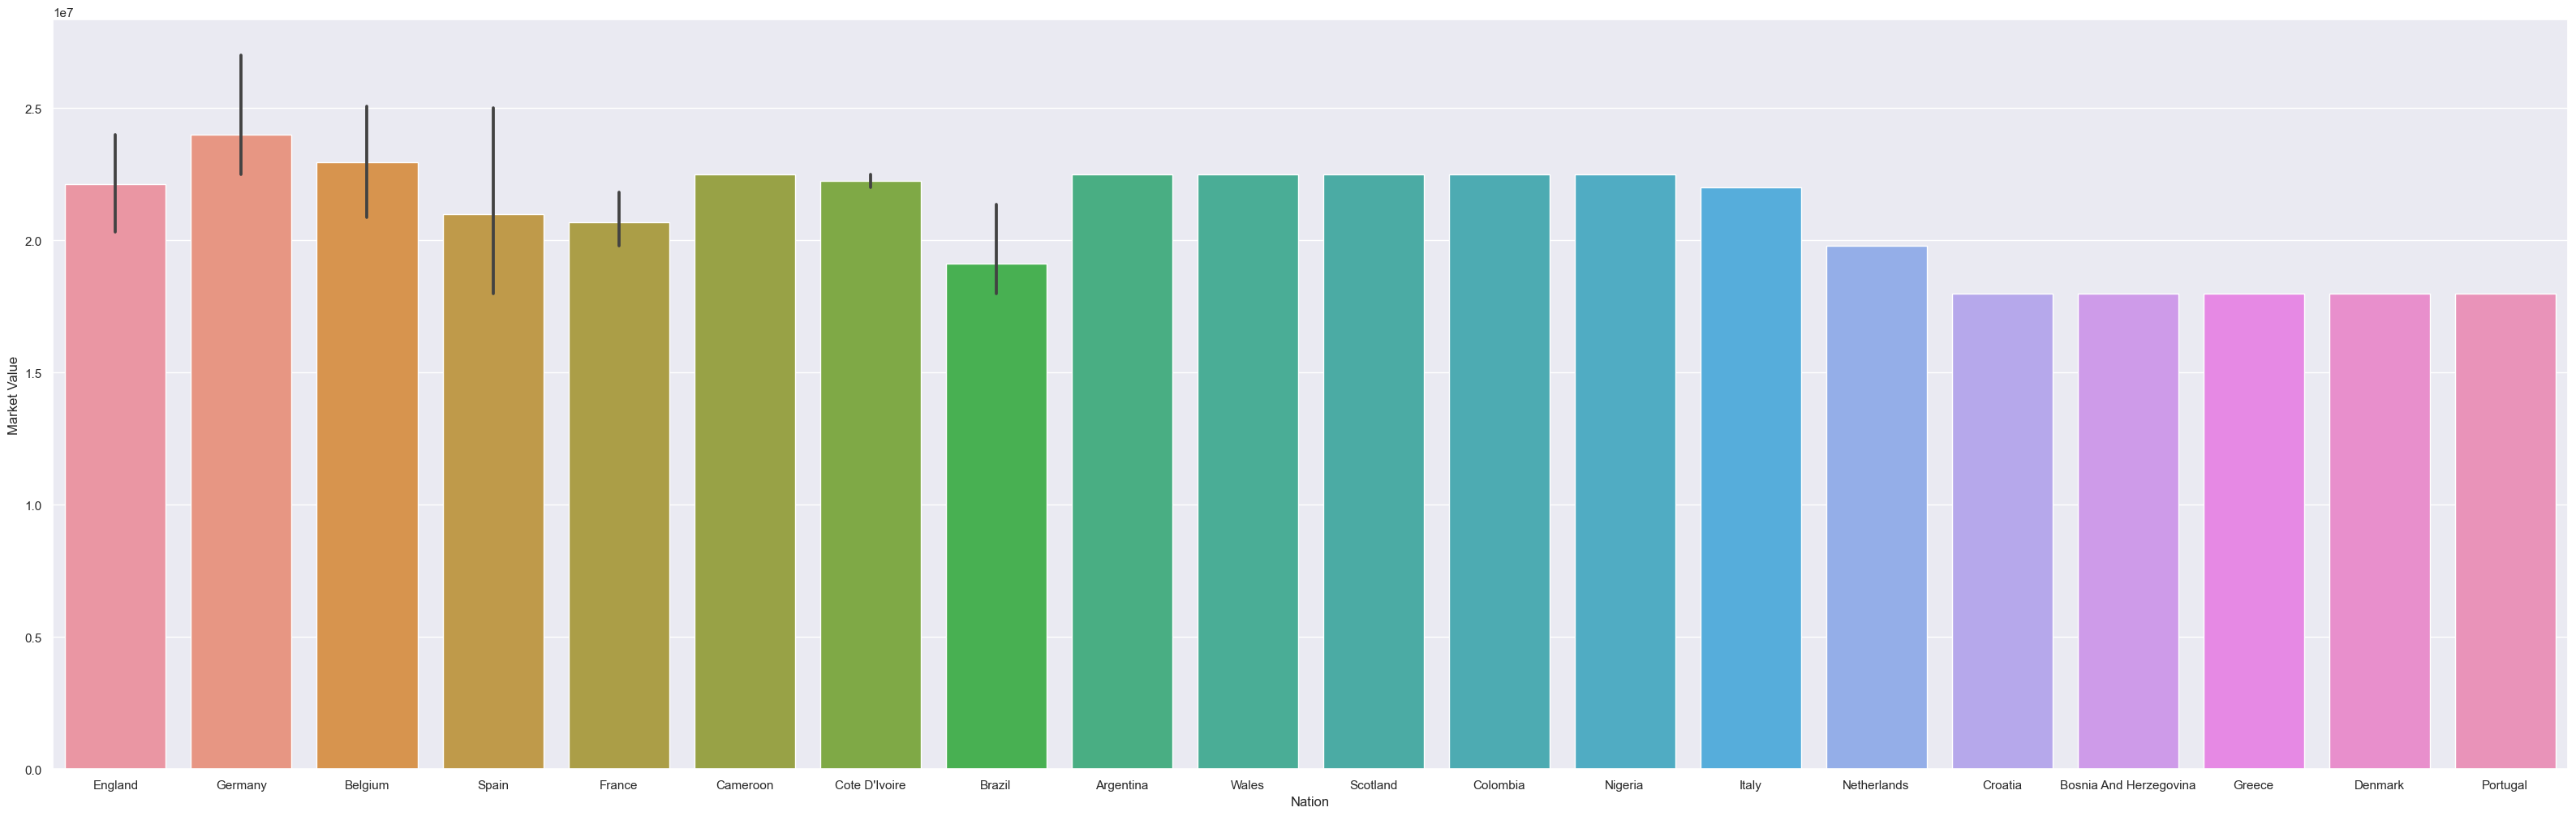

In [9]:
sbn.barplot(trimmed_def[:50],x="Nation",y="Market Value")

In [32]:
numerical_features = [var for var in trimmed_def.columns if trimmed_def[var].dtype != 'O']

num_trim_def = trimmed_def[numerical_features]

num_trim_def.diff(axis=0)
# num_trim_def.head()

,Season,Born,Age,Previous Market Value,Market Value,App,Minutes,Goals,Passes,Assists,Yellow,Red,SubOn,SubOff,Shots,SOT,HitPost,HeadClear,HeadGoal,PKScored,FKGoal,Offsides,ThrBall,Misses,Corners,Crosses,Blocks,Interceptions,Fouls,Last man,Tackles,ELG,OwnGoal,Clears,ABW,ABL
341,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1297,-1.0,2.0,-3.0,-7200000.0,0.0,16.0,1474.0,2.0,1186.0,1.0,7.0,0.0,-1.0,-2.0,23.0,5.0,2.0,83.0,2.0,0.0,0.0,1.0,4.0,1.0,-14.0,-37.0,-2.0,53.0,23.0,0.0,39.0,0.0,0.0,119.0,95.0,56.0
892,2.0,3.0,-1.0,-4500000.0,0.0,3.0,317.0,-2.0,94.0,2.0,0.0,0.0,0.0,0.0,-3.0,1.0,-2.0,-46.0,-2.0,0.0,0.0,0.0,-2.0,13.0,14.0,32.0,8.0,-41.0,7.0,0.0,1.0,0.0,0.0,-49.0,-54.0,-33.0
659,-2.0,-8.0,6.0,6600000.0,-1800000.0,4.0,305.0,0.0,393.0,-4.0,-6.0,0.0,0.0,2.0,-7.0,-3.0,2.0,89.0,0.0,0.0,0.0,-1.0,-1.0,-14.0,-15.0,-43.0,9.0,21.0,-21.0,0.0,-12.0,2.0,0.0,150.0,57.0,6.0
724,-1.0,7.0,-8.0,-8400000.0,0.0,0.0,-118.0,0.0,-485.0,0.0,-2.0,0.0,2.0,-1.0,-6.0,-3.0,-2.0,-48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,13.0,14.0,-10.0,0.0,3.0,1.0,0.0,-103.0,-53.0,-4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54,-1.0,-6.0,5.0,-200000.0,-200000.0,14.0,1413.0,-1.0,463.0,1.0,3.0,1.0,-1.0,-1.0,-1.0,-5.0,0.0,-8.0,-1.0,0.0,0.0,2.0,0.0,0.0,0.0,115.0,4.0,25.0,13.0,0.0,44.0,2.0,2.0,-16.0,-2.0,-3.0
146,3.0,5.0,-1.0,250000.0,-100000.0,0.0,-55.0,1.0,-94.0,0.0,-1.0,-1.0,-1.0,8.0,11.0,4.0,0.0,-10.0,0.0,0.0,0.0,-3.0,3.0,15.0,0.0,-109.0,2.0,-14.0,-2.0,0.0,-4.0,-2.0,-2.0,2.0,13.0,17.0
267,0.0,0.0,0.0,-900000.0,-100000.0,1.0,-219.0,-1.0,91.0,1.0,-5.0,0.0,5.0,-3.0,-2.0,2.0,1.0,-8.0,0.0,0.0,0.0,2.0,-4.0,-4.0,34.0,128.0,-9.0,-16.0,-12.0,0.0,-17.0,0.0,0.0,-1.0,-21.0,0.0
91,-3.0,-2.0,-2.0,1350000.0,0.0,-11.0,-453.0,0.0,-193.0,-2.0,3.0,1.0,-6.0,-6.0,-14.0,-3.0,-1.0,17.0,0.0,0.0,0.0,-2.0,0.0,-12.0,-34.0,-59.0,0.0,18.0,-1.0,0.0,-8.0,0.0,0.0,22.0,-4.0,-21.0


/var/folders/cr/gwwkbgg11dn7gbbs06llw8800000gn/T/ipykernel_16100/4117174616.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sbn.heatmap(def_df.corr(),vmin=-1,vmax=1,square=True,annot=True)


<Axes: >

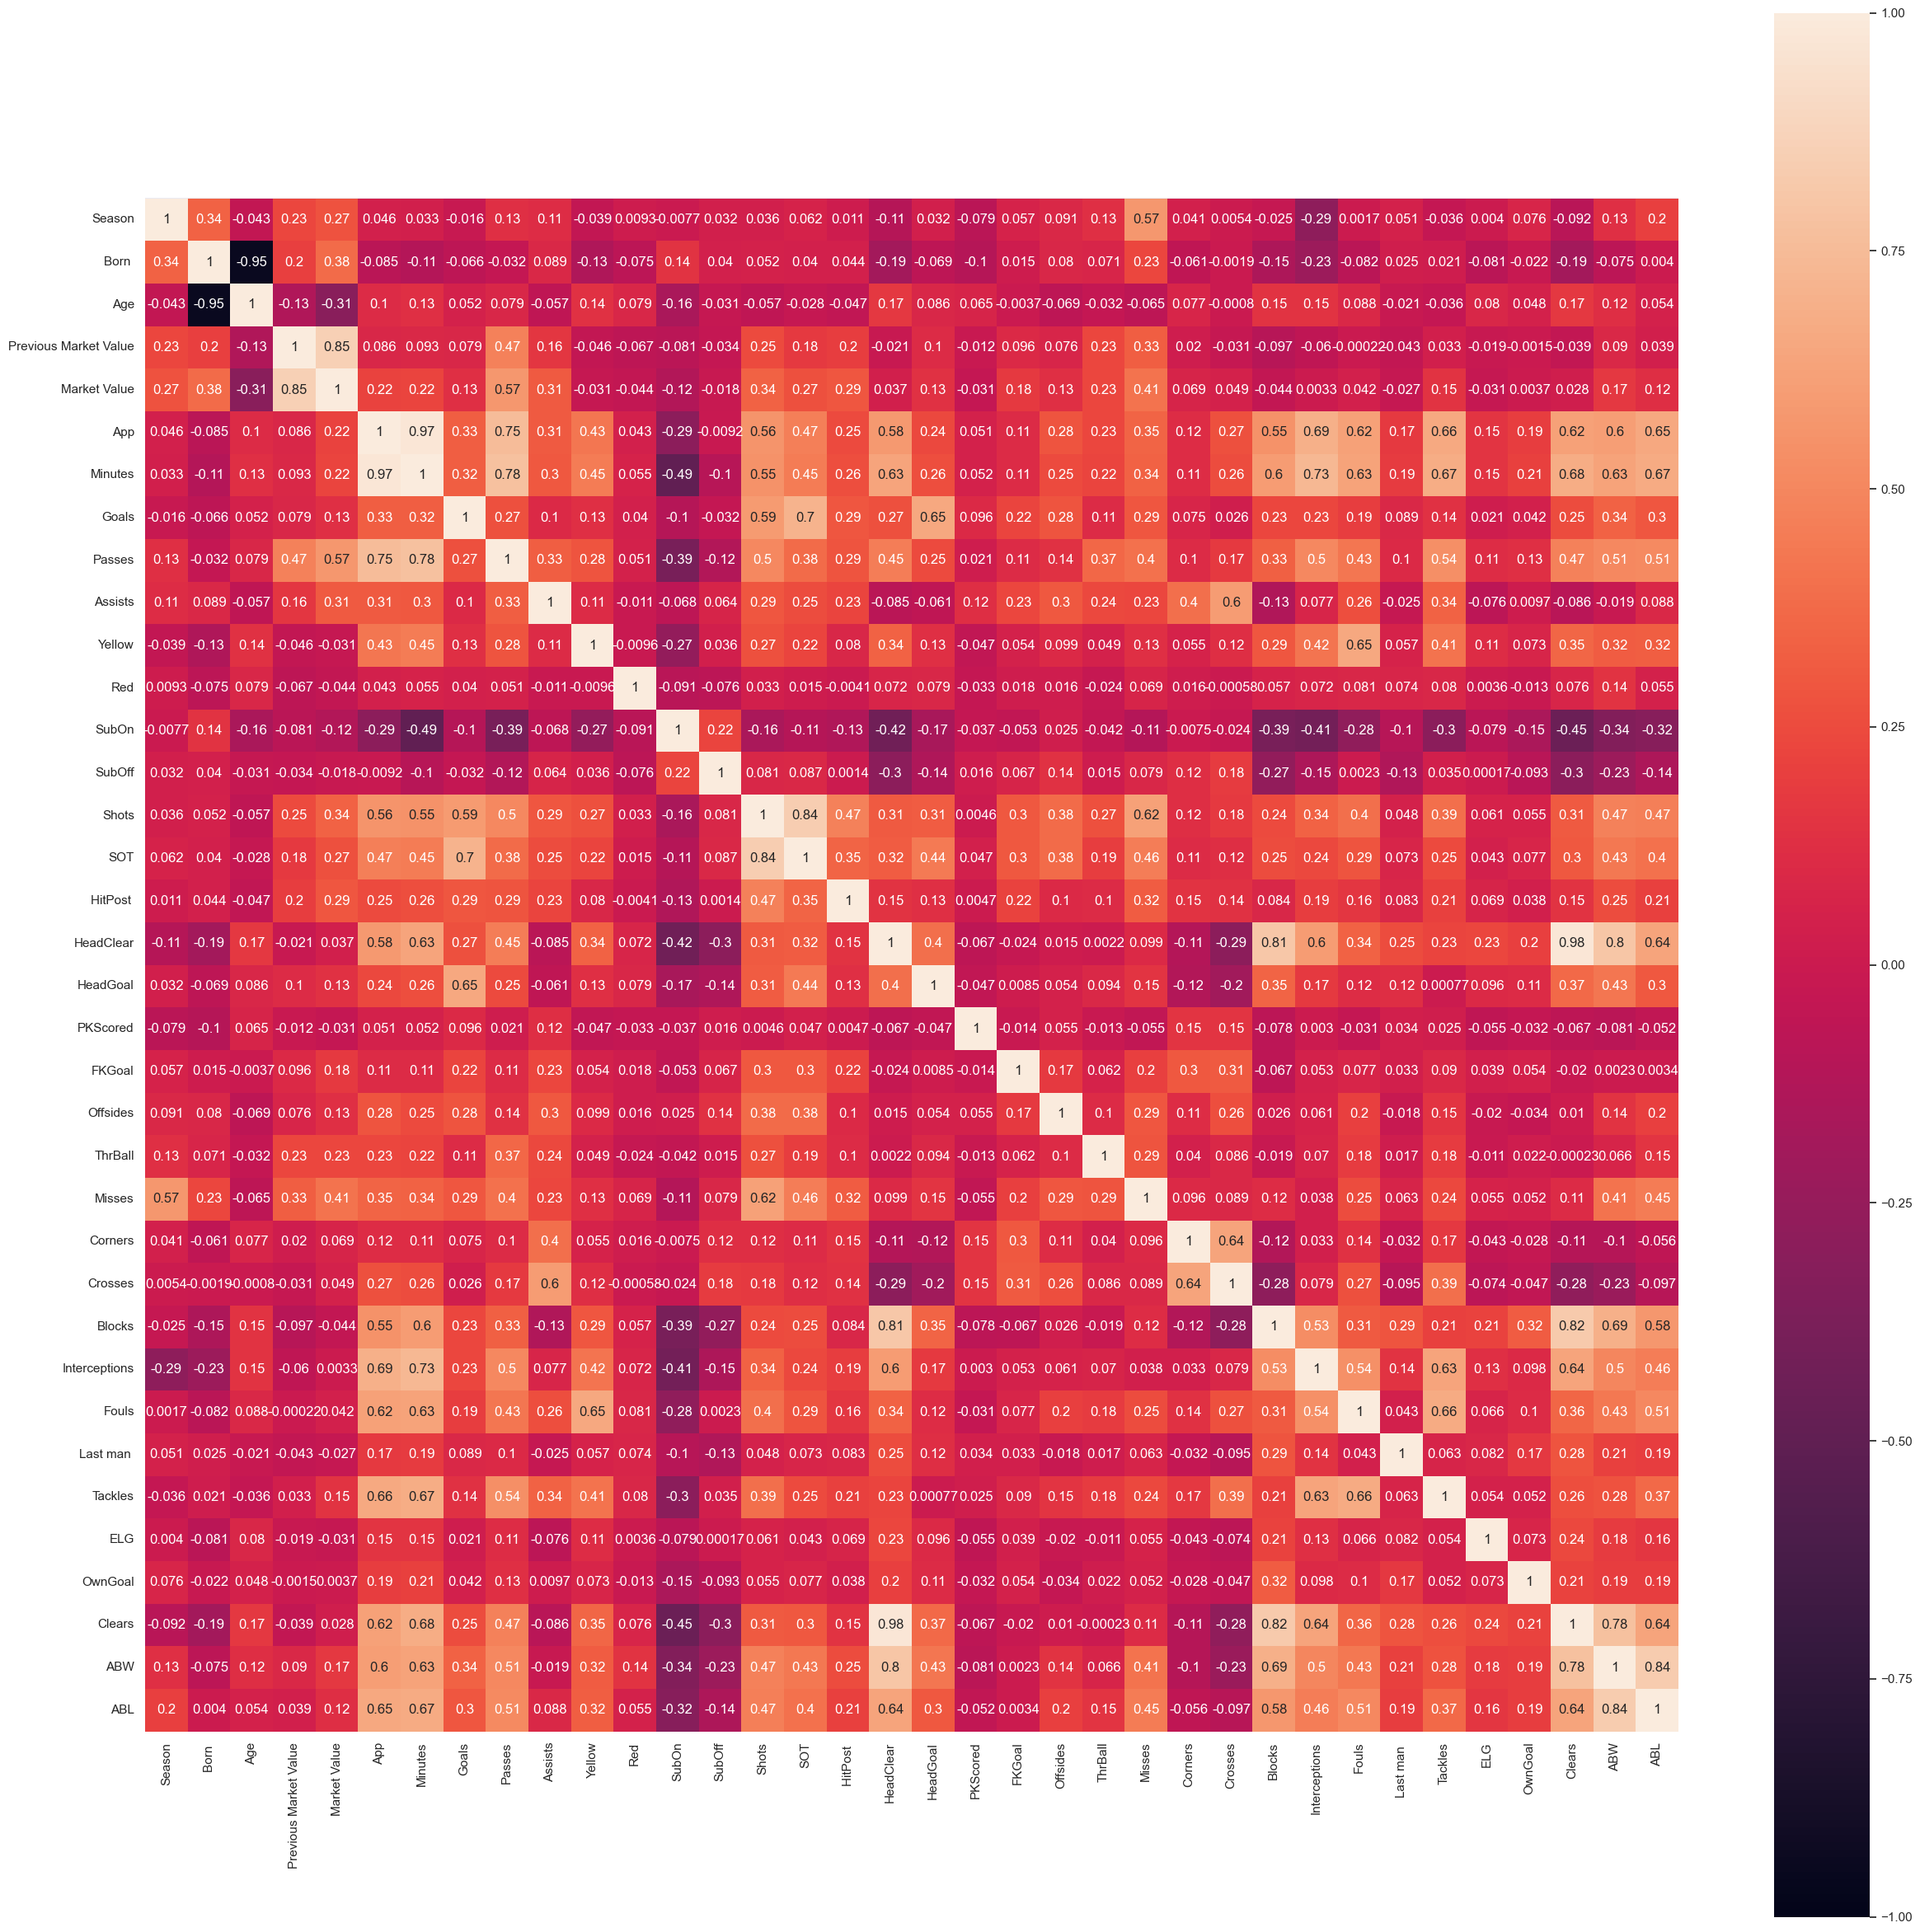

In [11]:
fig, ax = plt.subplots(figsize=(30, 30))

sbn.heatmap(def_df.corr(),vmin=-1,vmax=1,square=True,annot=True)